방문지정보 전체 데이터 개수 구하고 x좌표, y좌표 결측치 수 구하기

In [2]:
#TS파일
import pandas as pd

# CSV 파일 경로
visit_path = "C:/Users/Owner/Desktop/MINIPROJECT_LOCAL/data/01-1.정식개방데이터/Training/01.원천데이터/TS_csv/tn_visit_area_info_방문지정보_B.csv"

# 데이터 불러오기
visit_df = pd.read_csv(visit_path, encoding='utf-8')

# 전체 데이터 개수
print("전체 데이터 수:", len(visit_df))

# X좌표와 Y좌표 결측치 수
print("X좌표 결측치 수:", visit_df['X_COORD'].isna().sum())
print("Y좌표 결측치 수:", visit_df['Y_COORD'].isna().sum())

# X 또는 Y 중 하나라도 결측인 경우 필터링
missing_coords = visit_df[visit_df['X_COORD'].isna() | visit_df['Y_COORD'].isna()]

# 결측치 행 중 필요한 컬럼 보기
if 'VISIT_AREA_NM' in visit_df.columns:
    print(missing_coords[['VISIT_AREA_ID', 'VISIT_AREA_NM', 'VISIT_AREA_TYPE_CD', 'LODGING_TYPE_CD']].head())
else:
    print("VISIT_AREA_NM 컬럼이 포함되어 있는지 확인해보세요.")


전체 데이터 수: 36984
X좌표 결측치 수: 7170
Y좌표 결측치 수: 7170
    VISIT_AREA_ID VISIT_AREA_NM  VISIT_AREA_TYPE_CD  LODGING_TYPE_CD
16     2211120005             집                  21              NaN
18     2208190010       송정유로주차장                   9              NaN
20     2209020001             집                  21              NaN
27     2210160003    미래농원(mrnw)                   1              NaN
37     2210280001             집                  21              NaN


C:\Users\Owner\AppData\Local\Temp\ipykernel_24648\461137523.py:8: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  visit_df = pd.read_csv(visit_path, encoding='utf-8')


In [3]:
#VS파일
import pandas as pd

# CSV 파일 경로
visit_path2 = "C:/Users/Owner/Desktop/MINIPROJECT_LOCAL/data/01-1.정식개방데이터/Validation/01.원천데이터/VS_csv/tn_visit_area_info_방문지정보_B.csv"

# 데이터 불러오기
visit_df2 = pd.read_csv(visit_path2, encoding='utf-8')

# 전체 데이터 개수
print("전체 데이터 수:", len(visit_df2))

# X좌표와 Y좌표 결측치 수
print("X좌표 결측치 수:", visit_df2['X_COORD'].isna().sum())
print("Y좌표 결측치 수:", visit_df2['Y_COORD'].isna().sum())

# X 또는 Y 중 하나라도 결측인 경우 필터링
missing_coords2 = visit_df2[visit_df2['X_COORD'].isna() | visit_df2['Y_COORD'].isna()]

# 결측치 행 중 필요한 컬럼 보기
if 'VISIT_AREA_NM' in visit_df2.columns:
    print(missing_coords2[['VISIT_AREA_ID', 'VISIT_AREA_NM', 'VISIT_AREA_TYPE_CD', 'LODGING_TYPE_CD']].head())
else:
    print("VISIT_AREA_NM 컬럼이 포함되어 있는지 확인해보세요.")


전체 데이터 수: 4623
X좌표 결측치 수: 911
Y좌표 결측치 수: 911
    VISIT_AREA_ID VISIT_AREA_NM  VISIT_AREA_TYPE_CD  LODGING_TYPE_CD
1      2208300001             집                  21              NaN
8      2210290003      탑골로5길 39                  22              NaN
17     2210230001             집                  21              NaN
35     2210070016             집                  21              NaN
40     2211050001             집                  21              NaN


x좌표, y좌표가 결측치인 방문지유형 검사

TS파일

21 집    5342
11 식당/카페     452
22 친구/친지집     385
24 숙소     234
4 상업지구(거리,시장,쇼핑시설)      113
1 자연관광지      103
9 역,터미널,고속도로휴게소       76
7 산책로,둘레길 등       71
10 상점      69
12 기타      56
2 역사/유적/종교 시설(문화재,박물관,촬영지,절 등)       52
13 체험활동관광지      51
23 사무실      48
3 문화시설(공연장,영화관,전시관 등)       37
8 지역축제/행사      35
6 테마시설(놀이공원,워터파크)      25
5 레저/스포츠관련시설(스키,카트,수상레저)       21

VS파일

21 집   689
22 친구/친지집    50
11 식당/카페    45
24 숙소    30
4 상업지구(거리,시장,쇼핑시설)     17
1 자연관광지     14
9 역,터미널,고속도로휴게소     10
7 산책로,둘레길 등      9
12 기타     9
23 사무실     8
8 지역축제/행사      7
10 상점      6
2 역사/유적/종교 시설(문화재,박물관,촬영지,절 등)      5
3 문화시설(공연장,영화관,전시관 등)      4
6 테마시설(놀이공원,워터파크)       4
13 체험활동관광지     4


In [4]:
# VISIT_AREA_NM 컬럼 기준으로 몇 번씩 결측에 등장했는지 집계
#TS파일
missing_name_counts = missing_coords['VISIT_AREA_NM'].value_counts()
print(missing_coords['VISIT_AREA_TYPE_CD'].value_counts())

VISIT_AREA_TYPE_CD
21    5342
11     452
22     385
24     234
4      113
1      103
9       76
7       71
10      69
12      56
2       52
13      51
23      48
3       37
8       35
6       25
5       21
Name: count, dtype: int64


In [15]:
# VISIT_AREA_NM 컬럼 기준으로 몇 번씩 결측에 등장했는지 집계
#VS파일
missing_name_counts2 = missing_coords2['VISIT_AREA_NM'].value_counts()
print(missing_coords2['VISIT_AREA_TYPE_CD'].value_counts())

VISIT_AREA_TYPE_CD
21    689
22     50
11     45
24     30
4      17
1      14
9      10
7       9
12      9
23      8
8       7
10      6
2       5
3       4
6       4
13      4
Name: count, dtype: int64


기타(56개)는 어떤 값이 있나? -> 제거하기로 결심하다. -> 제거하지 않기로 결심하다.

In [3]:
#TS파일
# 먼저 결측치가 있는 행 추출 (이미 했던 코드)
missing_coords = visit_df[visit_df['X_COORD'].isna() | visit_df['Y_COORD'].isna()]

# 그 중에서 VISIT_AREA_TYPE_CD가 12인 행만 추출
missing_etc = missing_coords[missing_coords['VISIT_AREA_TYPE_CD'] == 12]

# VISIT_AREA_NM 전체 출력
print("결측치 + 기타(12) 유형 방문지 수:", len(missing_etc))
print(missing_etc[['VISIT_AREA_ID', 'VISIT_AREA_NM']])

결측치 + 기타(12) 유형 방문지 수: 56
       VISIT_AREA_ID         VISIT_AREA_NM
541       2210120003     부산대학교 부산캠퍼스 경제통상관
1211      2210140006       해운대블루라인파크 송정정거장
1793      2209210002            서울대학교 동물병원
1850      2211060005                   동내면
1861      2210060007                스위치속초점
2205      2210220011              순긋해변 야영장
2441      2208210005                   윗개천
2600      2210230006             양지동 666번지
2852      2210300001        마을주변 환경정비(플로깅)
3066      2210310002             참 좋은 신경외과
3880      2210290004            동네산책 이모집인근
6193      2210150011                   친구집
7311      2210240005               교학사 교커피
7659      2210290003         이마트24 진주인사원룸점
9405      2210020004             W시티컨벤션웨딩홀
9928      2209240011               쏘카 반납장소
12216     2208230001          아이앤락pc 하단2호점
13666     2208240001                아담노래타운
13843     2211100006             여자친구 어머니댁
13893     2210020003            포토하임 황리단길점
14323     2210080005                매암제 다원
16476     2210290009        

In [16]:
#VS파일
# 먼저 결측치가 있는 행 추출 (이미 했던 코드)
missing_coords2 = visit_df2[visit_df2['X_COORD'].isna() | visit_df2['Y_COORD'].isna()]

# 그 중에서 VISIT_AREA_TYPE_CD가 12인 행만 추출
missing_etc2 = missing_coords2[missing_coords2['VISIT_AREA_TYPE_CD'] == 12]

# VISIT_AREA_NM 전체 출력
print("결측치 + 기타(12) 유형 방문지 수:", len(missing_etc2))
print(missing_etc2[['VISIT_AREA_ID', 'VISIT_AREA_NM']])

결측치 + 기타(12) 유형 방문지 수: 9
      VISIT_AREA_ID  VISIT_AREA_NM
370      2210160009  대구 수성구 무학로 78
425      2209030003       포토하임 경주점
583      2208220005         아바니테라피
898      2210300004      울산 인디고pc방
1941     2208150004         아버지 산소
2864     2210230008     유천농협분소 정류장
2987     2210220006       순긋해변 야영장
4083     2210290006     양리단길 바베큐파티
4252     2208060003      장유동 843-2


이거 무시하기!!!
X_COORD 또는 Y_COORD가 결측치이고
VISIT_AREA_TYPE_CD가 21, 22, 23, 12 중 하나인 행 → 제거 하려다가 제거하지 않기로 결정.

In [7]:
import pandas as pd

# 파일 경로
ts_path = "C:/Users/Owner/Desktop/MINIPROJECT_LOCAL/data/01-1.정식개방데이터/Training/01.원천데이터/TS_csv/tn_visit_area_info_방문지정보_B.csv"
vs_path = "C:/Users/Owner/Desktop/MINIPROJECT_LOCAL/data/01-1.정식개방데이터/Validation/01.원천데이터/VS_csv/tn_visit_area_info_방문지정보_B.csv"

# 파일 로드
ts_df_raw = pd.read_csv(ts_path, encoding='utf-8')
vs_df_raw = pd.read_csv(vs_path, encoding='utf-8')

# 분석 대상 코드
target_types = [21, 22, 23, 12]

# TS 통계
print("📁 TS 파일:")
ts_counts = ts_df_raw['VISIT_AREA_TYPE_CD'].value_counts().sort_index()
print(ts_counts[ts_counts.index.isin(target_types)])

# VS 통계
print("\n📁 VS 파일:")
vs_counts = vs_df_raw['VISIT_AREA_TYPE_CD'].value_counts().sort_index()
print(vs_counts[vs_counts.index.isin(target_types)])

C:\Users\Owner\AppData\Local\Temp\ipykernel_24172\2422552575.py:8: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  ts_df_raw = pd.read_csv(ts_path, encoding='utf-8')


📁 TS 파일:
VISIT_AREA_TYPE_CD
12     452
21    5600
22     943
23     190
Name: count, dtype: int64

📁 VS 파일:
VISIT_AREA_TYPE_CD
12     50
21    723
22    127
23     21
Name: count, dtype: int64


In [4]:
#TS파일
import pandas as pd

# 방문지 정보 파일
visit_path = "C:/Users/Owner/Desktop/MINIPROJECT_LOCAL/data/01-1.정식개방데이터/Training/01.원천데이터/TS_csv/tn_visit_area_info_방문지정보_B.csv"
visit_df = pd.read_csv(visit_path, encoding='utf-8')

# POI 마스터 파일
poi_path = "C:/Users/Owner/Desktop/MINIPROJECT_LOCAL/data/01-1.정식개방데이터/Training/01.원천데이터/TS_csv/tn_poi_master_POIMaster.csv"
poi_df = pd.read_csv(poi_path, encoding='utf-8')

C:\Users\Owner\AppData\Local\Temp\ipykernel_17160\4072498190.py:6: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  visit_df = pd.read_csv(visit_path, encoding='utf-8')
C:\Users\Owner\AppData\Local\Temp\ipykernel_17160\4072498190.py:10: DtypeWarning: Columns (3,4,12) have mixed types. Specify dtype option on import or set low_memory=False.
  poi_df = pd.read_csv(poi_path, encoding='utf-8')


In [17]:
#VS파일
import pandas as pd

# 방문지 정보 파일
visit_path2 = "C:/Users/Owner/Desktop/MINIPROJECT_LOCAL/data/01-1.정식개방데이터/Validation/01.원천데이터/VS_csv/tn_visit_area_info_방문지정보_B.csv"
visit_df2 = pd.read_csv(visit_path2, encoding='utf-8')

# POI 마스터 파일
poi_path2 = "C:/Users/Owner/Desktop/MINIPROJECT_LOCAL/data/01-1.정식개방데이터/Validation/01.원천데이터/VS_csv/tn_poi_master_POIMaster.csv"
poi_df2 = pd.read_csv(poi_path2, encoding='utf-8')

C:\Users\Owner\AppData\Local\Temp\ipykernel_17160\288052472.py:10: DtypeWarning: Columns (3,4,12) have mixed types. Specify dtype option on import or set low_memory=False.
  poi_df2 = pd.read_csv(poi_path2, encoding='utf-8')


In [ ]:
#####실행하기 말기!!
#TS파일
# 좌표 결측치가 있는 행 중에서
#missing_coords = visit_df[visit_df['X_COORD'].isna() | visit_df['Y_COORD'].isna()]

# TYPE_CD가 21/22/23/12인 행만 필터링
#drop_types = [21, 22, 23, 12]
#to_drop = missing_coords[missing_coords['VISIT_AREA_TYPE_CD'].isin(drop_types)]

# 이들 제거하고 나머지만 남기기
#visit_cleaned = visit_df.drop(index=to_drop.index)
######

In [ ]:
#####실행하기 말기!!
#VS파일
# 좌표 결측치가 있는 행 중에서
#missing_coords2 = visit_df2[visit_df2['X_COORD'].isna() | visit_df2['Y_COORD'].isna()]

# TYPE_CD가 21/22/23/12인 행만 필터링
#drop_types2 = [21, 22, 23, 12]
#to_drop2 = missing_coords2[missing_coords2['VISIT_AREA_TYPE_CD'].isin(drop_types2)]

# 이들 제거하고 나머지만 남기기
#visit_cleaned2 = visit_df2.drop(index=to_drop2.index)
######

나머지 X/Y 결측치가 있는 행들 중:
POI_ID, POI_NM을 활용해서
tn_poi_master_POIMaster.csv의 POI_ID, POI_NM, X_COORD, Y_COORD와 JOIN
좌표를 채움

In [5]:
#TS파일
# 다시 결측치가 있는 행만 필터링
#still_missing = visit_cleaned[visit_cleaned['X_COORD'].isna() | visit_cleaned['Y_COORD'].isna()]

# POI_ID 기준으로 poi_df에서 좌표 가져오기
# 필요한 컬럼만 추출
poi_coords = poi_df[['POI_ID', 'X_COORD', 'Y_COORD']].copy()
poi_coords.columns = ['POI_ID', 'POI_X', 'POI_Y']  # 충돌 방지 위해 이름 변경

# LEFT JOIN: visit_cleaned의 POI_ID 기준으로 좌표 붙이기
merged = pd.merge(visit_df, poi_coords, how='left', on='POI_ID')

# 원래 좌표가 없는 경우에만 POI 좌표로 보완
merged['X_COORD'] = merged['X_COORD'].fillna(merged['POI_X'])
merged['Y_COORD'] = merged['Y_COORD'].fillna(merged['POI_Y'])

# 불필요한 보조 컬럼 제거
final_df = merged.drop(columns=['POI_X', 'POI_Y'])

In [18]:
#vS파일
# 다시 결측치가 있는 행만 필터링
#still_missing2 = visit_cleaned2[visit_cleaned2['X_COORD'].isna() | visit_cleaned2['Y_COORD'].isna()]

# POI_ID 기준으로 poi_df에서 좌표 가져오기
# 필요한 컬럼만 추출
poi_coords2 = poi_df2[['POI_ID', 'X_COORD', 'Y_COORD']].copy()
poi_coords2.columns = ['POI_ID', 'POI_X', 'POI_Y']  # 충돌 방지 위해 이름 변경

# LEFT JOIN: visit_cleaned의 POI_ID 기준으로 좌표 붙이기
merged2 = pd.merge(visit_df2, poi_coords2, how='left', on='POI_ID')

# 원래 좌표가 없는 경우에만 POI 좌표로 보완
merged2['X_COORD'] = merged2['X_COORD'].fillna(merged2['POI_X'])
merged2['Y_COORD'] = merged2['Y_COORD'].fillna(merged2['POI_Y'])

# 불필요한 보조 컬럼 제거
final_df2 = merged2.drop(columns=['POI_X', 'POI_Y'])

TS파일
전체 데이터 수: 36984
X좌표 결측치 수: 7170
Y좌표 결측치 수: 7170
채우고 남은 결측치수 255 -> 이건 제거합니다!
VS파일
전체 데이터 수: 4623
X좌표 결측치 수: 911
Y좌표 결측치 수: 911
채우고 남은 결측치수 38 -> 이건 제거합니다!

In [8]:
#TS파일
print("POI 정보로 채운 후 남은 결측치 수:",
      final_df['X_COORD'].isna().sum(), final_df['Y_COORD'].isna().sum())

POI 정보로 채운 후 남은 결측치 수: 4747 4747


In [19]:
#VS파일
print("POI 정보로 채운 후 남은 결측치 수:",
      final_df2['X_COORD'].isna().sum(), final_df2['Y_COORD'].isna().sum())

POI 정보로 채운 후 남은 결측치 수: 623 623


In [9]:
#TS파일
# POI 이름으로 좌표 보완하기 위해 컬럼 추출 및 이름 충돌 방지
poi_by_name = poi_df[['POI_NM', 'X_COORD', 'Y_COORD']].copy()
poi_by_name.columns = ['POI_NM', 'POI_X_from_name', 'POI_Y_from_name']

In [20]:
#VS파일
# POI 이름으로 좌표 보완하기 위해 컬럼 추출 및 이름 충돌 방지
poi_by_name2 = poi_df[['POI_NM', 'X_COORD', 'Y_COORD']].copy()
poi_by_name2.columns = ['POI_NM', 'POI_X_from_name', 'POI_Y_from_name']

In [10]:
#TS파일
# POI_ID로 채우고도 여전히 결측인 애들만 따로
still_missing_after_poi_id = final_df[final_df['X_COORD'].isna() | final_df['Y_COORD'].isna()]

# POI_NM 기준으로 merge
final_with_name_filled = pd.merge(
    final_df,
    poi_by_name,
    how='left',
    on='POI_NM'
)

# 다시 한 번 좌표 보완 (X/Y가 비어 있는 경우만)
final_with_name_filled['X_COORD'] = final_with_name_filled['X_COORD'].fillna(final_with_name_filled['POI_X_from_name'])
final_with_name_filled['Y_COORD'] = final_with_name_filled['Y_COORD'].fillna(final_with_name_filled['POI_Y_from_name'])

# 임시 컬럼 제거
final_cleaned = final_with_name_filled.drop(columns=['POI_X_from_name', 'POI_Y_from_name'])

In [21]:
#VS파일
# POI_ID로 채우고도 여전히 결측인 애들만 따로
still_missing_after_poi_id2 = final_df2[final_df2['X_COORD'].isna() | final_df2['Y_COORD'].isna()]

# POI_NM 기준으로 merge
final_with_name_filled2 = pd.merge(
    final_df2,
    poi_by_name2,
    how='left',
    on='POI_NM'
)

# 다시 한 번 좌표 보완 (X/Y가 비어 있는 경우만)
final_with_name_filled2['X_COORD'] = final_with_name_filled2['X_COORD'].fillna(final_with_name_filled2['POI_X_from_name'])
final_with_name_filled2['Y_COORD'] = final_with_name_filled2['Y_COORD'].fillna(final_with_name_filled2['POI_Y_from_name'])

# 임시 컬럼 제거
final_cleaned2 = final_with_name_filled2.drop(columns=['POI_X_from_name', 'POI_Y_from_name'])

In [11]:
#TS파일
print("최종적으로도 좌표가 없는 행 수:",
      final_cleaned['X_COORD'].isna().sum(), final_cleaned['Y_COORD'].isna().sum())

최종적으로도 좌표가 없는 행 수: 255 255


In [22]:
#VS파일
print("최종적으로도 좌표가 없는 행 수:",
      final_cleaned2['X_COORD'].isna().sum(), final_cleaned2['Y_COORD'].isna().sum())

최종적으로도 좌표가 없는 행 수: 38 38


In [12]:
#TS파일
# X 또는 Y가 결측치인 행 제거
final_ready = final_cleaned.dropna(subset=['X_COORD', 'Y_COORD'])

# 확인: 결측치가 없는지
print("최종 데이터에서 결측치 수:", final_ready['X_COORD'].isna().sum(), final_ready['Y_COORD'].isna().sum())
print("최종 데이터 shape:", final_ready.shape)

최종 데이터에서 결측치 수: 0 0
최종 데이터 shape: (605429, 23)


In [23]:
#vS파일
# X 또는 Y가 결측치인 행 제거
final_ready2 = final_cleaned2.dropna(subset=['X_COORD', 'Y_COORD'])

# 확인: 결측치가 없는지
print("최종 데이터에서 결측치 수:", final_ready2['X_COORD'].isna().sum(), final_ready2['Y_COORD'].isna().sum())
print("최종 데이터 shape:", final_ready2.shape)

최종 데이터에서 결측치 수: 0 0
최종 데이터 shape: (89187, 23)


파일 저장

In [13]:
#TS파일
final_df.to_csv("ts_방문지정보_좌표보완완료.csv", index=False, encoding='utf-8-sig')

In [24]:
#VS파일
final_df2.to_csv("vs_방문지정보_좌표보완완료.csv", index=False, encoding='utf-8-sig')

TS, VS 결측치 제거한 방문지정보 파일 합치기

In [25]:
import pandas as pd

# 파일 경로
ts_path = "ts_방문지정보_좌표보완완료.csv"
vs_path = "vs_방문지정보_좌표보완완료.csv"

# 파일 읽기
ts_df = pd.read_csv(ts_path, encoding='utf-8')
vs_df = pd.read_csv(vs_path, encoding='utf-8')

# 출처 구분을 위한 SET 컬럼 추가
ts_df['SET'] = 'Training'
vs_df['SET'] = 'Validation'

# 두 데이터프레임 합치기
merged_df = pd.concat([ts_df, vs_df], ignore_index=True)

# 결과 확인
print("합쳐진 데이터 shape:", merged_df.shape)
print(merged_df['SET'].value_counts())


합쳐진 데이터 shape: (41607, 24)
SET
Training      36984
Validation     4623
Name: count, dtype: int64


C:\Users\Owner\AppData\Local\Temp\ipykernel_17160\3040363933.py:8: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  ts_df = pd.read_csv(ts_path, encoding='utf-8')


In [26]:
# 최종 병합된 방문지 정보 저장
merged_df.to_csv("통합_방문지정보_좌표완료.csv", index=False, encoding='utf-8-sig')


통합_방문지정보_좌표 완료에서 필요한 컬럼만 뽑아서 새로 저장
여행 ID, 방문지 ID, 진행순서, X좌표, Y좌표

In [1]:
# 필요한 컬럼 목록
cols_to_keep = ['TRAVEL_ID', 'VISIT_AREA_ID', 'VISIT_ORDER', 'X_COORD', 'Y_COORD']

# 필요한 컬럼만 추출
filtered_df = final_df[cols_to_keep].copy()

# 새 파일로 저장
filtered_df.to_csv("방문지정보_좌표보완_필요컬럼.csv", index=False, encoding='utf-8-sig')

print("필요한 컬럼만 추출하여 방문지정보_좌표보완_필요컬럼.csv로 저장했습니다.")

NameError: name 'final_df' is not defined

최종 방문지정보 파일인 "방문지정보_좌표보완_필요컬럼.csv"에서 결측치, 이상치 확인하기.
'TRAVEL_ID', 'VISIT_AREA_ID'는 결측치만 확인
나머지 'VISIT_ORDER', 'X_COORD', 'Y_COORD'는 결측치랑 이상치 모두 확인

In [30]:
df = pd.read_csv("방문지정보_좌표보완_필요컬럼.csv", encoding='utf-8-sig')

#TRAVEL_ID, VISIT_AREA_ID의 결측치만 확인
print("🔍 TRAVEL_ID 결측치 수:", df['TRAVEL_ID'].isna().sum())
print("🔍 VISIT_AREA_ID 결측치 수:", df['VISIT_AREA_ID'].isna().sum())

#VISIT_ORDER, X/Y_COORD의 결측치 확인
print("🔍 VISIT_ORDER 결측치 수:", df['VISIT_ORDER'].isna().sum())
print("🔍 X_COORD 결측치 수:", df['X_COORD'].isna().sum())
print("🔍 Y_COORD 결측치 수:", df['Y_COORD'].isna().sum())

#df['X_COORD'] 열에 숫자가 아닌 문자열(str)이 섞여 있어서 에러 발생
#X_COORD, Y_COORD, VISIT_ORDER를 숫자로 변환 후 비교하기
df['X_COORD'] = pd.to_numeric(df['X_COORD'], errors='coerce')
df['Y_COORD'] = pd.to_numeric(df['Y_COORD'], errors='coerce')
df['VISIT_ORDER'] = pd.to_numeric(df['VISIT_ORDER'], errors='coerce')

#VISIT_ORDER, X/Y_COORD의 이상치 확인
#VISIT_ORDER: 음수, X_COORD, Y_COORD: 일반적으로 대한민국 기준으로 X_COORD: 120~140, Y_COORD: 30~45 범위를 벗어나면 이상치로 판단 가능
visit_order_outliers = df[df['VISIT_ORDER'] < 0]
x_outliers = df[(df['X_COORD'] < 120) | (df['X_COORD'] > 140)]
y_outliers = df[(df['Y_COORD'] < 30) | (df['Y_COORD'] > 45)]

print("\n🚨 VISIT_ORDER 이상치 수 (음수):", visit_order_outliers.shape[0])
print("🚨 X_COORD 이상치 수 (120~140 밖):", x_outliers.shape[0])
print("🚨 Y_COORD 이상치 수 (30~45 밖):", y_outliers.shape[0])

🔍 TRAVEL_ID 결측치 수: 0
🔍 VISIT_AREA_ID 결측치 수: 0
🔍 VISIT_ORDER 결측치 수: 0
🔍 X_COORD 결측치 수: 4747
🔍 Y_COORD 결측치 수: 4747

🚨 VISIT_ORDER 이상치 수 (음수): 0
🚨 X_COORD 이상치 수 (120~140 밖): 1
🚨 Y_COORD 이상치 수 (30~45 밖): 1


일단 결측치랑 이상치가 있는 행을 뽑았습니다.

In [32]:
# 전처리: 숫자형 변환 (먼저 한 번만 해주세요)
df['X_COORD'] = pd.to_numeric(df['X_COORD'], errors='coerce')
df['Y_COORD'] = pd.to_numeric(df['Y_COORD'], errors='coerce')
df['VISIT_ORDER'] = pd.to_numeric(df['VISIT_ORDER'], errors='coerce')

# 결측치와 이상치 행 각각 추출
## 결측치 조건
missing_travel_id = df[df['TRAVEL_ID'].isna()]
missing_visit_area_id = df[df['VISIT_AREA_ID'].isna()]
missing_visit_order = df[df['VISIT_ORDER'].isna()]
missing_x = df[df['X_COORD'].isna()]
missing_y = df[df['Y_COORD'].isna()]

## 이상치 조건
visit_order_outliers = df[df['VISIT_ORDER'] < 0]
x_outliers = df[(df['X_COORD'] < 120) | (df['X_COORD'] > 140)]
y_outliers = df[(df['Y_COORD'] < 30) | (df['Y_COORD'] > 45)]

#한눈에 보기 위한 출력
print("🧪 결측치 행 수")
print("TRAVEL_ID:", missing_travel_id.shape[0])
print("VISIT_AREA_ID:", missing_visit_area_id.shape[0])
print("VISIT_ORDER:", missing_visit_order.shape[0])
print("X_COORD:", missing_x.shape[0])
print("Y_COORD:", missing_y.shape[0])

print("\n🧨 이상치 행 수")
print("VISIT_ORDER 음수:", visit_order_outliers.shape[0])
print("X_COORD 범위 밖:", x_outliers.shape[0])
print("Y_COORD 범위 밖:", y_outliers.shape[0])

🧪 결측치 행 수
TRAVEL_ID: 0
VISIT_AREA_ID: 0
VISIT_ORDER: 0
X_COORD: 4751
Y_COORD: 4748

🧨 이상치 행 수
VISIT_ORDER 음수: 0
X_COORD 범위 밖: 1
Y_COORD 범위 밖: 1


🚨🚨🚨🚨🚨여기부터!!!!🚨🚨🚨🚨🚨

In [1]:
import pandas as pd

# 1. 파일 불러오기
# 파일 경로
ts_path = r"C:/Users/Owner/Desktop/MINIPROJECT_LOCAL/data/01-1.정식개방데이터/Training/01.원천데이터/TS_csv/tn_visit_area_info_방문지정보_B.csv"
vs_path = r"C:/Users/Owner/Desktop/MINIPROJECT_LOCAL/data/01-1.정식개방데이터/Validation/01.원천데이터/VS_csv/tn_visit_area_info_방문지정보_B.csv"
# 파일 불러오기
ts_bangmoon = pd.read_csv(ts_path, encoding='utf-8-sig')
vs_bangmoon = pd.read_csv(vs_path, encoding='utf-8-sig')
# 데이터 병합
merged_bangmoon = pd.concat([ts_bangmoon, vs_bangmoon], ignore_index=True)

# 2. 필요한 컬럼만 추출
cols_to_keep = ['TRAVEL_ID', 'VISIT_AREA_ID', 'VISIT_ORDER', 'X_COORD', 'Y_COORD', 'POI_ID', 'POI_NM']
bangmoon_filtered = merged_bangmoon[cols_to_keep].copy()

# 3. 새 파일로 저장
bangmoon_filtered.to_csv("방문지정보_필요컬럼.csv", index=False, encoding='utf-8-sig')

print("🎉 방문지정보_필요컬럼.csv 파일이 저장되었습니다!")

C:\Users\Owner\AppData\Local\Temp\ipykernel_23444\2516172805.py:8: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  ts_bangmoon = pd.read_csv(ts_path, encoding='utf-8-sig')


🎉 방문지정보_필요컬럼.csv 파일이 저장되었습니다!


In [2]:
import pandas as pd

# 파일 불러오기
df = pd.read_csv("방문지정보_필요컬럼.csv", encoding='utf-8-sig')

# 숫자형 변환 (오류 발생 시 NaN 처리)
df['VISIT_ORDER'] = pd.to_numeric(df['VISIT_ORDER'], errors='coerce')
df['X_COORD'] = pd.to_numeric(df['X_COORD'], errors='coerce')
df['Y_COORD'] = pd.to_numeric(df['Y_COORD'], errors='coerce')

# ✅ 결측치 탐지
missing_travel_id = df[df['TRAVEL_ID'].isna()]
missing_visit_area_id = df[df['VISIT_AREA_ID'].isna()]
missing_poi_id = df[df['POI_ID'].isna()]
missing_poi_nm = df[df['POI_NM'].isna()]
missing_visit_order = df[df['VISIT_ORDER'].isna()]
missing_x = df[df['X_COORD'].isna()]
missing_y = df[df['Y_COORD'].isna()]

# ✅ 이상치 탐지
visit_order_outliers = df[df['VISIT_ORDER'] < 0]
x_outliers = df[(df['X_COORD'] < 120) | (df['X_COORD'] > 140)]
y_outliers = df[(df['Y_COORD'] < 30) | (df['Y_COORD'] > 45)]

# ✅ 요약 출력
print("🧪 결측치 요약")
print("TRAVEL_ID 결측치:", missing_travel_id.shape[0])
print("VISIT_AREA_ID 결측치:", missing_visit_area_id.shape[0])
print("POI_ID 결측치:", missing_poi_id.shape[0])
print("POI_NM 결측치:", missing_poi_nm.shape[0])
print("VISIT_ORDER 결측치:", missing_visit_order.shape[0])
print("X_COORD 결측치:", missing_x.shape[0])
print("Y_COORD 결측치:", missing_y.shape[0])

print("\n🧨 이상치 요약")
print("VISIT_ORDER 이상치 (음수):", visit_order_outliers.shape[0])
print("X_COORD 이상치 (120~140 밖):", x_outliers.shape[0])
print("Y_COORD 이상치 (30~45 밖):", y_outliers.shape[0])

🧪 결측치 요약
TRAVEL_ID 결측치: 0
VISIT_AREA_ID 결측치: 0
POI_ID 결측치: 23592
POI_NM 결측치: 23592
VISIT_ORDER 결측치: 0
X_COORD 결측치: 8085
Y_COORD 결측치: 8082

🧨 이상치 요약
VISIT_ORDER 이상치 (음수): 0
X_COORD 이상치 (120~140 밖): 2
Y_COORD 이상치 (30~45 밖): 1


3. 여행 파일에서 필요 컬럼 뽑고 결측치랑 이상치 확인하기

In [3]:
import pandas as pd

# 1. 파일 불러오기
# 파일 경로
ts_path = r"C:/Users/Owner/Desktop/MINIPROJECT_LOCAL/data/01-1.정식개방데이터/Training/01.원천데이터/TS_csv/tn_travel_여행_B.csv"
vs_path = r"C:/Users/Owner/Desktop/MINIPROJECT_LOCAL/data/01-1.정식개방데이터/Validation/01.원천데이터/VS_csv/tn_travel_여행_B.csv"
# 파일 불러오기
ts_travel = pd.read_csv(ts_path, encoding='utf-8-sig')
vs_travel = pd.read_csv(vs_path, encoding='utf-8-sig')
# 데이터 병합
merged_travel = pd.concat([ts_travel, vs_travel], ignore_index=True)

# 2. 필요한 컬럼만 추출
cols_to_keep = ['TRAVEL_ID', 'TRAVEL_START_YMD', 'TRAVEL_END_YMD', 'MVMN_NM']
travel_filtered = merged_travel[cols_to_keep].copy()

# 3. 새 파일로 저장
travel_filtered.to_csv("여행_필요컬럼.csv", index=False, encoding='utf-8-sig')

print("🎉 여행_필요컬럼.csv 파일이 저장되었습니다!")

🎉 여행_필요컬럼.csv 파일이 저장되었습니다!


In [4]:
import pandas as pd

# 1. 파일 불러오기
df = pd.read_csv("여행_필요컬럼.csv", encoding='utf-8-sig')

# 2. 날짜 컬럼을 datetime으로 변환 (이상치는 NaT로 처리됨)
df['TRAVEL_START_YMD'] = pd.to_datetime(df['TRAVEL_START_YMD'], errors='coerce')
df['TRAVEL_END_YMD'] = pd.to_datetime(df['TRAVEL_END_YMD'], errors='coerce')

# 3. MVMN_NM 허용값 정의
valid_movement = ['자가용', '대중교통 등']

# 4. 결측치 탐지
missing_travel_id = df[df['TRAVEL_ID'].isna()]
missing_mvmn_nm = df[df['MVMN_NM'].isna()]
missing_start = df[df['TRAVEL_START_YMD'].isna()]
missing_end = df[df['TRAVEL_END_YMD'].isna()]

# 5. 이상치 탐지
invalid_mvmn_nm = df[~df['MVMN_NM'].isin(valid_movement) & df['MVMN_NM'].notna()]

# 6. 요약 출력
print("🧪 결측치 요약")
print("TRAVEL_ID 결측치:", missing_travel_id.shape[0])
print("MVMN_NM 결측치:", missing_mvmn_nm.shape[0])
print("TRAVEL_START_YMD 결측치 또는 이상치:", missing_start.shape[0])
print("TRAVEL_END_YMD 결측치 또는 이상치:", missing_end.shape[0])

print("\n🧨 이상치 요약")
print("MVMN_NM 이상치 (허용값 이외):", invalid_mvmn_nm.shape[0])

🧪 결측치 요약
TRAVEL_ID 결측치: 0
MVMN_NM 결측치: 692
TRAVEL_START_YMD 결측치 또는 이상치: 0
TRAVEL_END_YMD 결측치 또는 이상치: 0

🧨 이상치 요약
MVMN_NM 이상치 (허용값 이외): 0


4. 이동내역 파일에서 필요 컬럼 뽑고 결측치랑 이상치 확인하기
1 - 자가용(승용/승합/트럭 등등)
2 - 렌터카(승용/승합/버스 등등)
3 - 캠핑카(자차 및 렌탈)
4 - 택시
5 - 지하철
6 - 고속전철(ITX 등)
7 - KTX/SRT(고속열차)
8 - 새마을/무궁화열차
9 - 항공기
10 - 배/선박
11 - 관광버스
12 - 시외/고속버스
13 - 시내/마을버스
14 - 자전거
15 - 도보
16 - 기타
50 - 버스 + 지하철

In [9]:
import pandas as pd

# 1. 파일 경로 설정
ts_path = r"C:/Users/Owner/Desktop/MINIPROJECT_LOCAL/data/01-1.정식개방데이터/Training/01.원천데이터/TS_csv/tn_move_his_이동내역_B.csv"
vs_path = r"C:/Users/Owner/Desktop/MINIPROJECT_LOCAL/data/01-1.정식개방데이터/Validation/01.원천데이터/VS_csv/tn_move_his_이동내역_B.csv"

# 2. 파일 불러오기
ts_move = pd.read_csv(ts_path, encoding='utf-8-sig')
vs_move = pd.read_csv(vs_path, encoding='utf-8-sig')

# 3. 병합
merged_move = pd.concat([ts_move, vs_move], ignore_index=True)

# 4. 필요한 컬럼만 추출
cols_to_keep = ['TRAVEL_ID', 'START_VISIT_AREA_ID', 'END_VISIT_AREA_ID', 'MVMN_CD_1', 'MVMN_CD_2']
move_filtered = merged_move[cols_to_keep].copy()

# 5. 저장 (선택)
move_filtered.to_csv("이동내역_필요컬럼.csv", index=False, encoding='utf-8-sig')
print("✅ 이동내역_필요컬럼.csv 저장 완료!")

# 6. 결측치 수 확인
print("\n📌 결측치 개수")
for col in cols_to_keep:
    print(f"{col} 결측치 수:", move_filtered[col].isna().sum())


✅ 이동내역_필요컬럼.csv 저장 완료!

📌 결측치 개수
TRAVEL_ID 결측치 수: 0
START_VISIT_AREA_ID 결측치 수: 37974
END_VISIT_AREA_ID 결측치 수: 3617
MVMN_CD_1 결측치 수: 3617
MVMN_CD_2 결측치 수: 35651


In [7]:
# TRAVEL_ID당 START_VISIT_AREA_ID 개수 확인
check = move_filtered.groupby('TRAVEL_ID')['START_VISIT_AREA_ID'].nunique().reset_index()
multi_start = check[check['START_VISIT_AREA_ID'] > 1]

print(f"\n🚨 START 방문지가 2개 이상인 TRAVEL_ID 수: {len(multi_start)}")
if len(multi_start) > 0:
    print(multi_start.head())
else:
    print("🎉 모든 TRAVEL_ID는 START 방문지가 1개입니다. 단일 출발지 구조가 확정되었습니다!")


🚨 START 방문지가 2개 이상인 TRAVEL_ID 수: 17
      TRAVEL_ID  START_VISIT_AREA_ID
584   b_b001564                    2
965   b_b003172                    2
1509  b_b004859                    2
1699  b_b005367                    2
1754  b_b005573                    2


우선 합쳐볼게요
1. 여행 + 방문지내역: TRAVEL_ID 기준 (→ 이동 기준 테이블 완성)

2. 방문지정보와도 병합:
이동내역의 방문지ID를 하나로 통일하고 합치는거지

In [11]:
import pandas as pd

# 1. 파일 불러오기
travel_df = pd.read_csv("여행_필요컬럼.csv", encoding='utf-8-sig')
visit_df = pd.read_csv("방문지정보_필요컬럼.csv", encoding='utf-8-sig')
move_df = pd.read_csv("이동내역_필요컬럼.csv", encoding='utf-8-sig')

# 2. 여행 + 방문지정보 병합 (TRAVEL_ID 기준)
travel_visit = pd.merge(visit_df, travel_df, on='TRAVEL_ID', how='left')

# 3. 이동내역에서 VISIT_AREA_ID 하나로 정리
start_part = move_df[['TRAVEL_ID', 'START_VISIT_AREA_ID', 'MVMN_CD_1', 'MVMN_CD_2']].copy()
start_part = start_part.rename(columns={'START_VISIT_AREA_ID': 'VISIT_AREA_ID'})

end_part = move_df[['TRAVEL_ID', 'END_VISIT_AREA_ID', 'MVMN_CD_1', 'MVMN_CD_2']].copy()
end_part = end_part.rename(columns={'END_VISIT_AREA_ID': 'VISIT_AREA_ID'})

move_long = pd.concat([start_part, end_part], ignore_index=True)
move_long['이동정보존재'] = 1  # 마킹용 (필요 시)

# 중복 제거 (TRAVEL_ID, VISIT_AREA_ID 기준)
move_long = move_long.drop_duplicates(subset=['TRAVEL_ID', 'VISIT_AREA_ID'])

# 4. travel_visit + 이동정보 병합 (TRAVEL_ID + VISIT_AREA_ID 기준)
final_merged = pd.merge(travel_visit, move_long, on=['TRAVEL_ID', 'VISIT_AREA_ID'], how='left')

# 5. 결과 저장
final_merged.to_csv("여행+방문지+이동내역_통합.csv", index=False, encoding='utf-8-sig')
print("🎯 통합 완료: 여행 + 방문지 + 이동내역 병합 → 여행+방문지+이동내역_통합.csv")

🎯 통합 완료: 여행 + 방문지 + 이동내역 병합 → 여행+방문지+이동내역_통합.csv


🚨🚨🚨🚨🚨잠깐스탑!!!!🚨🚨🚨🚨🚨
################없던 일이 되어버린...###########3

🎯 케이스 1:
MVMN_NM == '자가용'인데
VMN_NAME_1 또는 VMN_NAME_2가 '지하철' 또는 '버스+지하철'

🎯 케이스 2:
MVMN_NM == '대중교통 등'인데
VMN_NAME_1 또는 VMN_NAME_2가 '자가용', '렌터카', '캠핑카'

In [7]:
# 🎯 케이스 1: MVMN_NM이 자가용인데, 실제 이동수단은 대중교통일 경우
case1 = merged[
    (merged['MVMN_NM'] == '자가용') &
    (
        (merged['MVMN_NAME_1'].isin(['지하철', '버스+지하철'])) |
        (merged['MVMN_NAME_2'].isin(['지하철', '버스+지하철']))
    )
]

# 🎯 케이스 2: MVMN_NM이 대중교통 등인데, 실제 이동수단은 자가용류일 경우
case2 = merged[
    (merged['MVMN_NM'] == '대중교통 등') &
    (
        (merged['MVMN_NAME_1'].isin(['자가용', '렌터카', '캠핑카'])) |
        (merged['MVMN_NAME_2'].isin(['자가용', '렌터카', '캠핑카']))
    )
]

# ✅ 결과 출력
print(f"🚗 케이스 1 (자가용인데 지하철 등 사용): {case1.shape[0]}건")
print(f"🚌 케이스 2 (대중교통인데 자가용류 사용): {case2.shape[0]}건")

🚗 케이스 1 (자가용인데 지하철 등 사용): 172건
🚌 케이스 2 (대중교통인데 자가용류 사용): 2206건


🚨🚨🚨🚨🚨다시 시작!!!!🚨🚨🚨🚨🚨
1. 두 POI 마스터 파일을 병합
→ poi_df

2. 출발방문지_X/Y좌표가 비어있을 경우

출발방문지_POI_ID 기준으로 poi_df에서 좌표 가져오기
그래도 비어있으면 출발방문지_POI_NM 기준으로 좌표 가져오기

3. 도착방문지_X/Y좌표도 같은 방식 적용

In [12]:
import pandas as pd

# 💡 통합 파일 불러오기 (파일명만 정확히 수정!)
merged = pd.read_csv("여행+방문지+이동내역_통합.csv", encoding='utf-8-sig')

# 1. POI 마스터 파일 각각 필요한 컬럼만 읽기
use_cols = ['POI_ID', 'POI_NM', 'X_COORD', 'Y_COORD']
ts_path = r"C:/Users/Owner/Desktop/MINIPROJECT_LOCAL/data/01-1.정식개방데이터/Training/01.원천데이터/TS_csv/tn_poi_master_POIMaster.csv"
vs_path = r"C:/Users/Owner/Desktop/MINIPROJECT_LOCAL/data/01-1.정식개방데이터/Validation/01.원천데이터/VS_csv/tn_poi_master_POIMaster.csv"

ts_poi = pd.read_csv(ts_path, encoding='utf-8-sig', usecols=use_cols)
vs_poi = pd.read_csv(vs_path, encoding='utf-8-sig', usecols=use_cols)

print("✅ 각 POI 파일 로딩 완료")

# 2. 중복 제거
ts_poi_id = ts_poi.drop_duplicates(subset='POI_ID', keep='first')
vs_poi_id = vs_poi.drop_duplicates(subset='POI_ID', keep='first')

ts_poi_nm = ts_poi.drop_duplicates(subset='POI_NM', keep='first')
vs_poi_nm = vs_poi.drop_duplicates(subset='POI_NM', keep='first')

# 3. 인덱스 설정
ts_id_x = ts_poi_id.set_index('POI_ID')['X_COORD']
ts_id_y = ts_poi_id.set_index('POI_ID')['Y_COORD']
ts_nm_x = ts_poi_nm.set_index('POI_NM')['X_COORD']
ts_nm_y = ts_poi_nm.set_index('POI_NM')['Y_COORD']

vs_id_x = vs_poi_id.set_index('POI_ID')['X_COORD']
vs_id_y = vs_poi_id.set_index('POI_ID')['Y_COORD']
vs_nm_x = vs_poi_nm.set_index('POI_NM')['X_COORD']
vs_nm_y = vs_poi_nm.set_index('POI_NM')['Y_COORD']

print("✅ 중복 제거 및 인덱스 설정 완료")

# 4. 좌표 보완 (X좌표, Y좌표 컬럼이 존재한다고 가정)
for id_x, id_y in [(ts_id_x, ts_id_y), (vs_id_x, vs_id_y)]:
    merged['X_COORD'] = merged['X_COORD'].fillna(merged['POI_ID'].map(id_x))
    merged['Y_COORD'] = merged['Y_COORD'].fillna(merged['POI_ID'].map(id_y))

for nm_x, nm_y in [(ts_nm_x, ts_nm_y), (vs_nm_x, vs_nm_y)]:
    merged['X_COORD'] = merged['X_COORD'].fillna(merged['POI_NM'].map(nm_x))
    merged['Y_COORD'] = merged['Y_COORD'].fillna(merged['POI_NM'].map(nm_y))

# 5. 결과 저장
merged.to_csv("좌표보완완료_여행+방문지+이동내역.csv", index=False, encoding='utf-8-sig')
print("📍 좌표 보완 완료 → 좌표보완완료_여행+방문지+이동내역.csv")

✅ 각 POI 파일 로딩 완료
✅ 중복 제거 및 인덱스 설정 완료
📍 좌표 보완 완료 → 좌표보완완료_여행+방문지+이동내역.csv


In [7]:
import pandas as pd

# 📂 1. 파일 불러오기
df = pd.read_csv("좌표보완완료_여행+방문지+이동내역.csv", encoding='utf-8-sig')

print("📊 결측치 확인 결과\n")

# 1. TRAVEL_ID 결측치 개수
print(f"TRAVEL_ID 결측치: {df['TRAVEL_ID'].isna().sum()}")

# 2. VISIT_AREA_ID 결측치 개수
print(f"VISIT_AREA_ID 결측치: {df['VISIT_AREA_ID'].isna().sum()}")

# 3. VISIT_ORDER 결측치 개수
print(f"VISIT_ORDER 결측치: {df['VISIT_ORDER'].isna().sum()}")

# 4. X/Y 좌표 결측치 개수
print(f"X_COORD 결측치: {df['X_COORD'].isna().sum()}")
print(f"Y_COORD 결측치: {df['Y_COORD'].isna().sum()}")

# 5. 좌표 결측 + POI_ID, POI_NM 모두 결측인 행 수
coord_and_poi_null = df[
    df['X_COORD'].isna() &
    df['Y_COORD'].isna() &
    df['POI_ID'].isna() &
    df['POI_NM'].isna()
]
print(f"X/Y 좌표도 없고 POI_ID/POI_NM도 없는 행 개수: {len(coord_and_poi_null)}")

# 6. MVMN_NM 결측치: TRAVEL_ID당 1번만 카운트
mvmn_null_travel = df[df['MVMN_NM'].isna()]['TRAVEL_ID'].dropna().nunique()
print(f"MVMN_NM이 결측인 TRAVEL_ID 개수 (중복 제거): {mvmn_null_travel}")

📊 결측치 확인 결과

TRAVEL_ID 결측치: 0
VISIT_AREA_ID 결측치: 0
VISIT_ORDER 결측치: 0
X_COORD 결측치: 293
Y_COORD 결측치: 293
X/Y 좌표도 없고 POI_ID/POI_NM도 없는 행 개수: 0
MVMN_NM이 결측인 TRAVEL_ID 개수 (중복 제거): 1092


방문지 수 3개 이하 확인

기초 통계:
count    4000.000000
mean       10.401750
std         5.720448
min         1.000000
25%         6.000000
50%         9.000000
75%        13.000000
max        48.000000
Name: VISIT_AREA_ID, dtype: float64

방문지 수 별 인원 수:
VISIT_AREA_ID
1       3
2      31
3      92
4     256
5     422
6     343
7     345
8     330
9     288
10    273
11    246
12    202
13    211
14    145
15    143
16    104
17    107
18     88
19     63
20     56
21     48
22     45
23     35
24     21
25     27
26     16
27     10
28     13
29      8
30      7
31      3
32      4
33      2
34      3
35      2
36      1
37      1
39      1
41      1
42      1
43      1
46      1
48      1
Name: count, dtype: int64


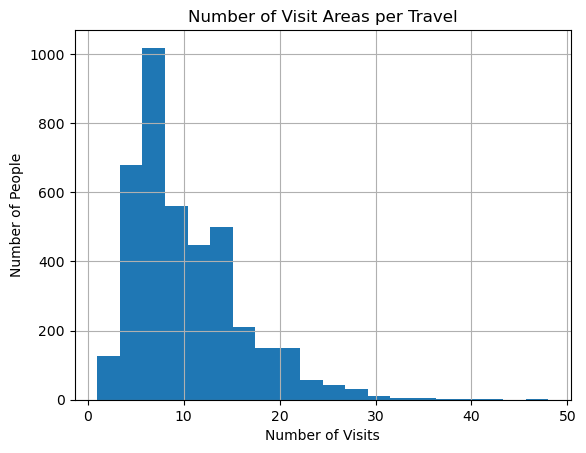


방문지 수가 3개 이하인 사람 수: 126

방문지 수가 4개인 사람 수: 256

방문지 수가 5개인 사람 수: 422


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

merged_df = pd.read_csv('좌표보완완료_여행+방문지+이동내역.csv')

# 3. TRAVEL_ID별 방문지 개수 (고유 VISIT_AREA_ID 수)
visit_counts = merged_df.groupby('TRAVEL_ID')['VISIT_AREA_ID'].nunique()

# 4. 기초 통계 출력
print("기초 통계:")
print(visit_counts.describe())

# 5. 방문지 수 분포 확인
print("\n방문지 수 별 인원 수:")
print(visit_counts.value_counts().sort_index())

# 6. 히스토그램 시각화
visit_counts.hist(bins=20)
plt.title("Number of Visit Areas per Travel")
plt.xlabel("Number of Visits")
plt.ylabel("Number of People")
plt.grid(True)
plt.show()

# 7. 방문지 수 3개 이하인 사람 수 확인
num_below_or_equal_3 = (visit_counts <= 3).sum()
print(f"\n방문지 수가 3개 이하인 사람 수: {num_below_or_equal_3}")
num_below_or_equal_4 = (visit_counts == 4).sum()
print(f"\n방문지 수가 4개인 사람 수: {num_below_or_equal_4}")
num_below_or_equal_5 = (visit_counts == 5).sum()
print(f"\n방문지 수가 5개인 사람 수: {num_below_or_equal_5}")

In [5]:
dups = merged_df.duplicated(subset=['TRAVEL_ID', 'VISIT_ORDER'])
print(f"중복된 순서 수: {dups.sum()}")

중복된 순서 수: 0


🚗 추정 주요 이동수단 분포 (TRAVEL_ID 기준):
추정이동수단
자가용     2589
기타       809
대중교통     598
Name: count, dtype: int64


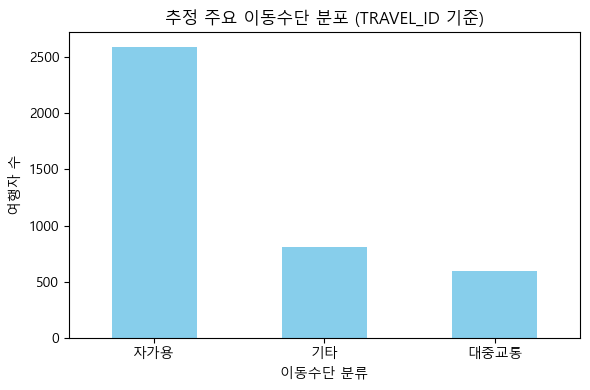

⚠️ 이동수단 코드 모두 결측인 TRAVEL_ID 수: 4
✅ 전체 TRAVEL_ID 수: 4000


C:\Users\Owner\AppData\Local\Temp\ipykernel_23104\1777965687.py:53: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  both_missing = df.groupby('TRAVEL_ID').apply(


In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("좌표보완완료_여행+방문지+이동내역.csv")

# ✅ 이동수단 코드 → 이동수단 명칭으로 변환 함수
def map_transport(code):
    if pd.isna(code):
        return None
    elif code in [1, 2, 3, 14]:
        return '자가용'
    elif code in [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 50]:
        return '대중교통'
    else:
        return '기타'

# ✅ 이동수단명 컬럼 생성
df['MVMN_TYPE_1'] = df['MVMN_CD_1'].apply(map_transport)
df['MVMN_TYPE_2'] = df['MVMN_CD_2'].apply(map_transport)

# ✅ 긴 형태로 변환하고 결측 제거
melted = pd.melt(
    df,
    id_vars='TRAVEL_ID',
    value_vars=['MVMN_TYPE_1', 'MVMN_TYPE_2'],
    value_name='MODE'
).dropna(subset=['MODE'])

# ✅ 각 TRAVEL_ID마다 추정 이동수단(최빈값) 구하기
main_mode = (
    melted.groupby('TRAVEL_ID')['MODE']
    .agg(lambda x: x.value_counts().sort_values(ascending=False).index[0])
    .reset_index()
    .rename(columns={'MODE': '추정이동수단'})
)

# ✅ 추정 결과 분포 보기
print("🚗 추정 주요 이동수단 분포 (TRAVEL_ID 기준):")
print(main_mode['추정이동수단'].value_counts())

# ✅ 시각화
plt.figure(figsize=(6, 4))
main_mode['추정이동수단'].value_counts().plot(kind='bar', color='skyblue')
plt.title("추정 주요 이동수단 분포 (TRAVEL_ID 기준)")
plt.xlabel("이동수단 분류")
plt.ylabel("여행자 수")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# ✅ 결측치인 TRAVEL_ID 수 세기
# → MVMN_CD_1과 MVMN_CD_2가 모두 결측인 TRAVEL_ID
both_missing = df.groupby('TRAVEL_ID').apply(
    lambda x: x['MVMN_CD_1'].isna().all() and x['MVMN_CD_2'].isna().all()
)

print("⚠️ 이동수단 코드 모두 결측인 TRAVEL_ID 수:", both_missing.sum())
print("✅ 전체 TRAVEL_ID 수:", df['TRAVEL_ID'].nunique())

In [31]:
import pandas as pd

df = pd.read_csv("좌표보완완료_여행+방문지+이동내역.csv")

# 이동수단 분류 함수 (기존 정의 재사용)
def map_transport(code):
    if code in [1, 2, 3, 14]:
        return '자가용'
    elif code in [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 50]:
        return '대중교통 등'
    elif code in [15, 16]:
        return '기타'
    else:
        return None

# 복사본에서 MVMN_CD_1,2를 이동수단 분류로 매핑
df = final_merged.copy()
df['MVMN_TYPE_1'] = df['MVMN_CD_1'].apply(map_transport)
df['MVMN_TYPE_2'] = df['MVMN_CD_2'].apply(map_transport)

# 두 컬럼을 합쳐 긴 형태로 만들고 결측 제거
melted = pd.melt(df, id_vars='TRAVEL_ID', value_vars=['MVMN_TYPE_1', 'MVMN_TYPE_2'], value_name='MODE')
melted = melted.dropna(subset=['MODE'])

# 각 TRAVEL_ID에서 이동수단별 빈도수 계산
mode_counts = melted.groupby(['TRAVEL_ID', 'MODE']).size().unstack(fill_value=0)

# 빈도가 2개이고, 모두 1회씩 등장한 경우만 추출
tied = mode_counts[(mode_counts > 0).sum(axis=1) == 2]     # 2종류가 존재
tied = tied[(tied == 1).all(axis=1)]                        # 둘 다 1번씩 등장

print(f"⚖️ 이동수단 추정 시 동률인 TRAVEL_ID 수: {len(tied)}")

⚖️ 이동수단 추정 시 동률인 TRAVEL_ID 수: 0


In [28]:
# 이동수단 코드 모두 결측인 TRAVEL_ID 수
missing_ids = df.groupby('TRAVEL_ID').apply(
    lambda x: x['MVMN_CD_1'].isna().all() and x['MVMN_CD_2'].isna().all()
)

print("⚠️ 이동수단 코드 모두 결측인 TRAVEL_ID 수:", missing_ids.sum())
print("✅ 전체 TRAVEL_ID 수:", df['TRAVEL_ID'].nunique())

# 👉 실제로 결측치 아닌 TRAVEL_ID 5개만 샘플로 출력
print("📌 예시 - 이동수단 있는 TRAVEL_ID:")
print(df[~df['TRAVEL_ID'].isin(missing_ids[missing_ids].index)]['TRAVEL_ID'].unique()[:5])

⚠️ 이동수단 코드 모두 결측인 TRAVEL_ID 수: 4
✅ 전체 TRAVEL_ID 수: 4000
📌 예시 - 이동수단 있는 TRAVEL_ID:
['b_b001138' 'b_b000246' 'b_b004595' 'b_b005102' 'b_b005081']


C:\Users\Owner\AppData\Local\Temp\ipykernel_23104\2399217811.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_ids = df.groupby('TRAVEL_ID').apply(


MVMN_CD_1 / MVMN_CD_2를 자가용/대중교통/기타로 분류

TRAVEL_ID별로 가장 많이 등장한 그룹(최빈값) 계산

MVMN_NM이 결측일 경우, 해당 최빈값으로 보완

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# 자가용 / 대중교통 등 분류 함수 (기타 → 대중교통 등 포함)
def map_transport(code):
    if code in [1, 2, 3, 14]:
        return '자가용'
    else:
        return '대중교통 등'

# 복사본 생성
df = final_merged.copy()

# 1, 2 이동수단 코드 → 범주로 매핑
df['MVMN_TYPE_1'] = df['MVMN_CD_1'].apply(map_transport)
df['MVMN_TYPE_2'] = df['MVMN_CD_2'].apply(map_transport)

# 긴 형태로 변환 후 결측 제거
melted = pd.melt(df, id_vars='TRAVEL_ID', value_vars=['MVMN_TYPE_1', 'MVMN_TYPE_2'], value_name='MODE')
melted = melted.dropna(subset=['MODE'])

# 최빈값 추정
main_mode = (
    melted.groupby('TRAVEL_ID')['MODE']
    .agg(lambda x: x.value_counts().index[0])
    .reset_index()
    .rename(columns={'MODE': '추정이동수단'})
)

# 원본에 merge 후 결측만 보완
df = df.merge(main_mode, on='TRAVEL_ID', how='left')
df['MVMN_NM'] = df['MVMN_NM'].fillna(df['추정이동수단'])

# 정확도 평가: 원래 값과 추정값 일치율
known = df[~df['추정이동수단'].isna() & ~df['MVMN_NM'].isna()]
accuracy = (known['MVMN_NM'] == known['추정이동수단']).mean()
print(f"📊 추정 정확도: {accuracy:.2%}")

# 결측치 수 확인
missing_count = df['MVMN_NM'].isna().sum()
print("🕳️ 남은 MVMN_NM 결측치 수:", missing_count)

# 결과 저장
df.to_csv("이동수단보완완료_통합파일.csv", index=False, encoding='utf-8-sig')
print("✅ 이동수단 보완 완료 파일 저장됨.")



📊 추정 정확도: 58.58%
🕳️ 남은 MVMN_NM 결측치 수: 0
✅ 이동수단 보완 완료 파일 저장됨.


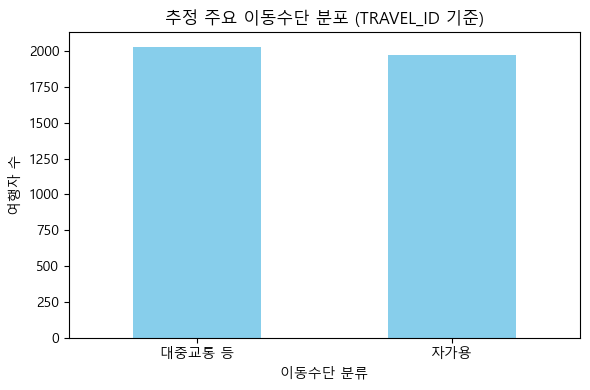

이동수단별 여행자 수 분포 (TRAVEL_ID 기준):
MVMN_NM
대중교통 등    2029
자가용       1971
Name: count, dtype: int64


In [22]:
# TRAVEL_ID 기준으로 대표값 하나씩만 남기기
unique_travel = df[['TRAVEL_ID', 'MVMN_NM']].drop_duplicates()

# 이동수단 분포 시각화
plt.figure(figsize=(6, 4))
unique_travel['MVMN_NM'].value_counts().plot(kind='bar', color='skyblue')
plt.title("추정 주요 이동수단 분포 (TRAVEL_ID 기준)")
plt.xlabel("이동수단 분류")
plt.ylabel("여행자 수")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 숫자로도 확인
print("이동수단별 여행자 수 분포 (TRAVEL_ID 기준):")
print(unique_travel['MVMN_NM'].value_counts())


In [23]:
# TRAVEL_ID 고유 개수 확인
num_unique_travel_ids = df['TRAVEL_ID'].nunique()
print("전체 TRAVEL_ID 고유 개수:", num_unique_travel_ids)

전체 TRAVEL_ID 고유 개수: 4000


In [24]:
# TRAVEL_ID당 MVMN_NM 값이 여러 개인 경우 확인
conflict = df[['TRAVEL_ID', 'MVMN_NM']].dropna().drop_duplicates()
multi_nm = conflict['TRAVEL_ID'].value_counts()
multi_nm = multi_nm[multi_nm > 1]
print("MVMN_NM이 여러 개인 TRAVEL_ID 개수:", len(multi_nm))

MVMN_NM이 여러 개인 TRAVEL_ID 개수: 0


In [32]:
# 필요한 컬럼만 로딩
use_cols = ['POI_ID', 'POI_NM', 'X_COORD', 'Y_COORD']
ts_path = r"C:/Users/Owner/Desktop/MINIPROJECT_LOCAL/data/01-1.정식개방데이터/Training/01.원천데이터/TS_csv/tn_poi_master_POIMaster.csv"
vs_path = r"C:/Users/Owner/Desktop/MINIPROJECT_LOCAL/data/01-1.정식개방데이터/Validation/01.원천데이터/VS_csv/tn_poi_master_POIMaster.csv"

# 각각 로딩
ts_poi = pd.read_csv(ts_path, encoding='utf-8-sig', usecols=use_cols)
vs_poi = pd.read_csv(vs_path, encoding='utf-8-sig', usecols=use_cols)
print("✅ 각 POI 파일 로딩 완료")

# 두 파일을 하나로 합침
poi_master_df = pd.concat([ts_poi, vs_poi], ignore_index=True)

# X/Y 좌표가 모두 결측치인 경우만 필터링
missing_coords = poi_master_df[
    poi_master_df['X_COORD'].isna() & poi_master_df['Y_COORD'].isna()
]

# POI_ID와 POI_NM만 보기 좋게 출력
missing_coords_info = missing_coords[['POI_ID', 'POI_NM']]

# 결과 출력
print("📌 X/Y 좌표가 결측인 POI 목록:")
print(missing_coords_info)

# 결측치 개수 출력
print(f"\n총 결측 POI 수: {len(missing_coords_info)}개")

✅ 각 POI 파일 로딩 완료
📌 X/Y 좌표가 결측인 POI 목록:
Empty DataFrame
Columns: [POI_ID, POI_NM]
Index: []

총 결측 POI 수: 0개


In [34]:
df = pd.read_csv("이동수단보완완료_통합파일.csv")

missing_coords = merged[merged['X_COORD'].isna() | merged['Y_COORD'].isna()]
print(f"📌 좌표 결측치 남은 행 수: {len(missing_coords)}개")
print(missing_coords[['POI_ID', 'POI_NM', 'X_COORD', 'Y_COORD']].head())

missing_id = merged[merged['POI_ID'].isna()]
print(f"❓ POI_ID가 결측인 행 수: {len(missing_id)}")

merged['POI_NM'] = merged['POI_NM'].str.strip()
ts_nm_x.index = ts_nm_x.index.str.strip()
ts_nm_y.index = ts_nm_y.index.str.strip()
vs_nm_x.index = vs_nm_x.index.str.strip()
vs_nm_y.index = vs_nm_y.index.str.strip()

print("📌 보완 후 남은 좌표 결측치 수:")
print("X_COORD:", merged['X_COORD'].isna().sum())
print("Y_COORD:", merged['Y_COORD'].isna().sum())

# 공백 제거
merged['POI_NM'] = merged['POI_NM'].astype(str).str.strip()

ts_nm_x.index = ts_nm_x.index.str.strip()
ts_nm_y.index = ts_nm_y.index.str.strip()
vs_nm_x.index = vs_nm_x.index.str.strip()
vs_nm_y.index = vs_nm_y.index.str.strip()

# POI_ID 기준으로도 보완되지 않은 것들
missing_poi_id_coords = merged[
    merged['X_COORD'].isna() &
    merged['POI_ID'].notna()
]

# 이 중에서 POI Master에 있는 ID인지 확인
missing_ids = set(missing_poi_id_coords['POI_ID'].unique())
ts_ids = set(ts_poi['POI_ID'])
vs_ids = set(vs_poi['POI_ID'])

missing_not_in_master = missing_ids - ts_ids - vs_ids
print(f"❌ POI Master에도 없는 POI_ID 수: {len(missing_not_in_master)}개")

C:\Users\Owner\AppData\Local\Temp\ipykernel_23104\2550491195.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("이동수단보완완료_통합파일.csv")


📌 좌표 결측치 남은 행 수: 293개
                POI_ID          POI_NM X_COORD Y_COORD
179  POI01000000C7HFS3            힐하우스     NaN     NaN
289  POI01000000BY8CUJ           한국아파트     NaN     NaN
376  POI01000000EHHHF4         힐스테이트초전     NaN     NaN
497  POI010000006N54NL       효원공원관리사무소     NaN     NaN
519  POI01000000C1XKWM  해운두산2차아파트/205동     NaN     NaN
❓ POI_ID가 결측인 행 수: 23592
📌 보완 후 남은 좌표 결측치 수:
X_COORD: 293
Y_COORD: 293
❌ POI Master에도 없는 POI_ID 수: 191개


In [ ]:
import pandas as pd

path_ts = r"C:/Users/Owner/Desktop/MINIPROJECT_LOCAL/data/01-1.정식개방데이터/Training/01.원천데이터/TS_csv/tn_move_his_이동내역_B.csv"
path_vs = r"C:/Users/Owner/Desktop/MINIPROJECT_LOCAL/data/01-1.정식개방데이터/Validation/01.원천데이터/VS_csv/tn_move_his_이동내역_B.csv"

move_ts = pd.read_csv(path_ts)
move_vs = pd.read_csv(path_vs)

# 통합
move_all = pd.concat([move_ts, move_vs], ignore_index=True)

# START → VISIT_AREA_ID
start_df = move_all[['TRAVEL_ID', 'START_VISIT_AREA_ID', 'MVMN_CD_1', 'MVMN_CD_2']].copy()
start_df = start_df.rename(columns={'START_VISIT_AREA_ID': 'VISIT_AREA_ID'})

# END → VISIT_AREA_ID
end_df = move_all[['TRAVEL_ID', 'END_VISIT_AREA_ID', 'MVMN_CD_1', 'MVMN_CD_2']].copy()
end_df = end_df.rename(columns={'END_VISIT_AREA_ID': 'VISIT_AREA_ID'})

# 연결
move_unified = pd.concat([start_df, end_df], ignore_index=True)

# 중복 제거
move_unified = move_unified.drop_duplicates(subset=['TRAVEL_ID', 'VISIT_AREA_ID'])


In [ ]:
import pandas as pd

# 📂 1. 파일 불러오기
df = pd.read_csv("좌표보완완료_여행+방문지+이동내역.csv", encoding='utf-8-sig')

# 📌 2. 이동수단 코드 분류 기준
private_car = [1, 2, 3, 14]
public_transport = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 50]
etc = [15, 16]

# 🏷️ 3. MVMN_TYPE 컬럼 생성
def classify_mvmn(code):
    if pd.isna(code):
        return '결측'
    try:
        code = int(code)
        if code in private_car:
            return '자가용'
        elif code in public_transport:
            return '대중교통 등'
        elif code in etc:
            return '기타'
        else:
            return '기타'  # 정의 외 값도 기타 처리
    except:
        return '오류'  # 숫자 변환 불가한 경우

df['MVMN_TYPE'] = df['MVMN_CD_1'].apply(classify_mvmn)

# 💾 4. 결과 저장
df.to_csv("이동수단분류포함_통합파일.csv", index=False, encoding='utf-8-sig')
print("✅ 이동수단 분류(MVMN_TYPE) 컬럼 추가 완료 → 이동수단분류포함_통합파일.csv")

출발방문지 존재하는 경우: START_VISIT_AREA_ID가 결측치가 아닌 경우
그 중에서 출발방문지_X좌표, 출발방문지_Y좌표의 결측치 개수

도착방문지 존재하는 경우: END_VISIT_AREA_ID가 결측치가 아닌 경우
그 중에서 도착방문지_X좌표, 도착방문지_Y좌표의 결측치 개수

In [9]:
# 출발방문지가 존재하는 경우
start_exists = merged[merged['START_VISIT_AREA_ID'].notna()]

missing_start_x = start_exists['출발방문지_X좌표'].isna().sum()
missing_start_y = start_exists['출발방문지_Y좌표'].isna().sum()

# 도착방문지가 존재하는 경우
end_exists = merged[merged['END_VISIT_AREA_ID'].notna()]

missing_end_x = end_exists['도착방문지_X좌표'].isna().sum()
missing_end_y = end_exists['도착방문지_Y좌표'].isna().sum()

# 출력
print("🚩 출발방문지 존재하는 경우:")
print("출발방문지_X좌표 결측치 수:", missing_start_x)
print("출발방문지_Y좌표 결측치 수:", missing_start_y)

print("\n🏁 도착방문지 존재하는 경우:")
print("도착방문지_X좌표 결측치 수:", missing_end_x)
print("도착방문지_Y좌표 결측치 수:", missing_end_y)

🚩 출발방문지 존재하는 경우:
출발방문지_X좌표 결측치 수: 139
출발방문지_Y좌표 결측치 수: 139

🏁 도착방문지 존재하는 경우:
도착방문지_X좌표 결측치 수: 128
도착방문지_Y좌표 결측치 수: 128


In [13]:
# 보고 싶은 TRAVEL_ID 목록
target_ids = ['b_b008335']

# 해당 TRAVEL_ID의 행만 필터링
sample_check = merged[merged['TRAVEL_ID'].isin(target_ids)]

# 결과 미리보기
pd.set_option('display.max_columns', None)  # 모든 컬럼 표시
print(sample_check.to_string(index=False))

TRAVEL_ID  START_VISIT_AREA_ID  END_VISIT_AREA_ID TRAVEL_START_YMD TRAVEL_END_YMD MVMN_NM  출발방문지_순서   출발방문지_X좌표  출발방문지_Y좌표      출발방문지_POI_ID 출발방문지_POI_NM  도착방문지_순서   도착방문지_X좌표   도착방문지_Y좌표      도착방문지_POI_ID 도착방문지_POI_NM
b_b008335                  NaN       2210230003.0       2022-10-22     2022-10-24  대중교통 등       NaN   129.05914  35.155237               NaN          NaN      14.0  126.848571   37.567152 POI01000000BYCVDP        보람아파트
b_b008335                  NaN       2210230005.0       2022-10-22     2022-10-24  대중교통 등       NaN   129.05914  35.155237               NaN          NaN      12.0 126.9706069 37.55467884 POI01000000E9LWII    서울역버스환승센터
b_b008335                  NaN       2210220009.0       2022-10-22     2022-10-24  대중교통 등       NaN   129.05914  35.155237               NaN          NaN       8.0 128.6465304 35.94498894               NaN          NaN
b_b008335                  NaN       2210220012.0       2022-10-22     2022-10-24  대중교통 등       NaN   129.05914  35.155237  

In [14]:
# 보고 싶은 TRAVEL_ID 목록
target_ids = ['b_b005388']

# 해당 TRAVEL_ID의 행만 필터링
sample_check = merged[merged['TRAVEL_ID'].isin(target_ids)]

# 결과 미리보기
pd.set_option('display.max_columns', None)  # 모든 컬럼 표시
print(sample_check.to_string(index=False))

TRAVEL_ID  START_VISIT_AREA_ID  END_VISIT_AREA_ID TRAVEL_START_YMD TRAVEL_END_YMD MVMN_NM  출발방문지_순서   출발방문지_X좌표  출발방문지_Y좌표      출발방문지_POI_ID 출발방문지_POI_NM  도착방문지_순서   도착방문지_X좌표   도착방문지_Y좌표      도착방문지_POI_ID 도착방문지_POI_NM
b_b005388                  NaN       2210090008.0       2022-10-09     2022-10-11  대중교통 등       NaN   129.05914  35.155237               NaN          NaN       2.0 126.8793103  35.1604031               NaN          NaN
b_b005388                  NaN       2210100002.0       2022-10-09     2022-10-11  대중교통 등       NaN   129.05914  35.155237               NaN          NaN       9.0 129.0613749 35.15789927               NaN          NaN
b_b005388                  NaN       2210090005.0       2022-10-09     2022-10-11  대중교통 등       NaN   129.05914  35.155237               NaN          NaN       5.0 129.1776963 35.15658074 POI010000006TBM2U        하이트빌라
b_b005388                  NaN       2210090004.0       2022-10-09     2022-10-11  대중교통 등       NaN   129.05914  35.155237  

In [15]:
# 보고 싶은 TRAVEL_ID 목록
target_ids = ['b_b000617']

# 해당 TRAVEL_ID의 행만 필터링
sample_check = merged[merged['TRAVEL_ID'].isin(target_ids)]

# 결과 미리보기
pd.set_option('display.max_columns', None)  # 모든 컬럼 표시
print(sample_check.to_string(index=False))

TRAVEL_ID  START_VISIT_AREA_ID  END_VISIT_AREA_ID TRAVEL_START_YMD TRAVEL_END_YMD MVMN_NM  출발방문지_순서  출발방문지_X좌표  출발방문지_Y좌표 출발방문지_POI_ID 출발방문지_POI_NM  도착방문지_순서   도착방문지_X좌표   도착방문지_Y좌표      도착방문지_POI_ID 도착방문지_POI_NM
b_b000617                  NaN       2208200001.0       2022-08-19     2022-08-22  대중교통 등       NaN  129.05914  35.155237          NaN          NaN      10.0 127.6343351  35.2028798               NaN          NaN
b_b000617                  NaN       2208200003.0       2022-08-19     2022-08-22  대중교통 등       NaN  129.05914  35.155237          NaN          NaN      12.0 127.8916495  34.9779676               NaN          NaN
b_b000617                  NaN       2208210003.0       2022-08-19     2022-08-22  대중교통 등       NaN  129.05914  35.155237          NaN          NaN      19.0 127.6246359 35.19247473 POI010000006YM5A1        성운각모텔
b_b000617                  NaN       2208200006.0       2022-08-19     2022-08-22  대중교통 등       NaN  129.05914  35.155237          NaN          NaN 